<a href="https://colab.research.google.com/github/THECODEDEMOGORGON/ml_workshop/blob/main/Workshop_first_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_____


# ML модель за 2 часа!
#### Представим, что мы разработчики в команде мобильного приложения. И вот, для нас появляется задача - научиться прогнозировать погоду на завтра. 
#### Чтобы решить эту задачу мы разберемся с основами анализа данных, посмотрим с каким типом задачи по машинному обучению мы столкнулись, а также попробуем применить реальные инстурменты аналитика данных для достижения наилучшего результата 🚀


## 0. Загрузка данных


In [ ]:
# Загрузим обучающую выборку
!wget --no-verbose https://raw.githubusercontent.com/KlrShaK/Delhi-Temperature-Prediction-Time-Series-data/master/daily_temp_dataset/DailyDelhiClimateTrain.csv
!wget --no-verbose https://raw.githubusercontent.com/KlrShaK/Delhi-Temperature-Prediction-Time-Series-data/master/daily_temp_dataset/DailyDelhiClimateTest.csv

2022-10-14 12:20:45 URL:https://raw.githubusercontent.com/KlrShaK/Delhi-Temperature-Prediction-Time-Series-data/master/daily_temp_dataset/DailyDelhiClimateTrain.csv [78199/78199] -> "DailyDelhiClimateTrain.csv" [1]
2022-10-14 12:20:46 URL:https://raw.githubusercontent.com/KlrShaK/Delhi-Temperature-Prediction-Time-Series-data/master/daily_temp_dataset/DailyDelhiClimateTest.csv [7100/7100] -> "DailyDelhiClimateTest.csv" [1]


In [ ]:
# Импортируем необходимые модули
import pandas as pd # Работа с данными в формате таблиц
import matplotlib.pyplot as plt # Построение графиков
import numpy as np # Работа с матрицами

## 1. Знакомство с библиотекой pandas, первичный анализ данных

**Pandas** - библиотека для работы с данными, представленными в формате таблиц. Она представляет собой быстрый и гибкий инструмент для аналитики, предобработки данных и т.д. Поэтому pandas - это мастхэв в любом DS проекте 💻

На примере нашего датасета мы познакомимся с основами pandas и поймем как ее можно применять в других проектах



https://pandas.pydata.org/docs/ - а тут можно глянуть документацию)



In [ ]:
train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
val = pd.read_csv('/content/DailyDelhiClimateTest.csv')

In [ ]:
train.head() # выведем первые 5 строчек считанной таблицы

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# мы можем взглянуть на общую информацию по таблице:         
# число действительных значений в колонках,
# типы данных, занимаемая память 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
# У нас есть даты - нужно перевести их в правильный формат
train['date'] = pd.to_datetime(train['date'])
val['date'] = pd.to_datetime(val['date'])

# у нас всего одна запись на каждую дату - сделаем ее индексом нашей таблицы
train.set_index('date', inplace=True)
val.set_index('date', inplace=True)



In [ ]:
# мы можем взглянуть на общую информацию по таблице:         
# число действительных значений в колонках,
# типы данных, занимаемая память 
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [ ]:
# также можем вывести описательные статистики колонок
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
# с помощью pandas также можно возвращать отдельные столбцы
train['meantemp']


date
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

In [ ]:
# также можно посчитать отдельные статистики
train['meantemp'].mean()

25.495520655761762

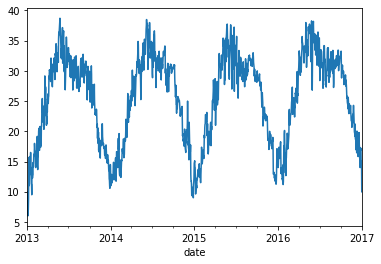

In [ ]:
# в pandas интегрирована быстрая работа с графиками
train['meantemp'].plot(); 

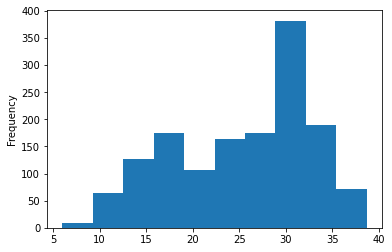

In [ ]:
# функция plot позволяет также указывать какой тип графика нам нужен
# построим гистограмму, чтобы оценить как распределен признака
train['meantemp'].plot(kind='hist'); 

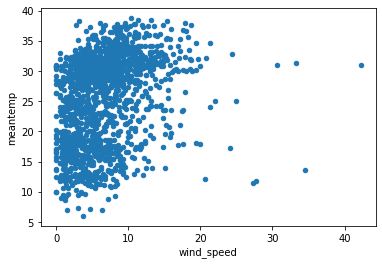

In [ ]:
# можно оценить как распределен один признак относительно другого
train[['wind_speed', 'meantemp']].plot(kind='scatter', x = 'wind_speed', y = 'meantemp');

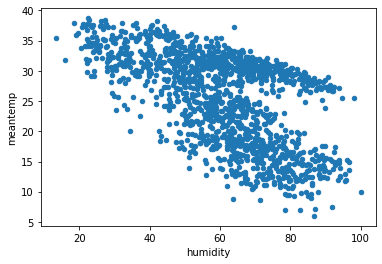

In [ ]:
train[['humidity', 'meantemp']].plot(kind='scatter', x = 'humidity', y = 'meantemp');

#### Мы не наблюдаем выраженной зависимости скорости ветра от температуры, а вот влажность и температура, кажется, обратно скоррелированы - давайте проверим.


In [ ]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,meantemp,humidity,wind_speed,meanpressure
meantemp,1.000000,-0.571951,0.306468,-0.038818
humidity,-0.571951,1.000000,-0.373972,0.001734
wind_speed,0.306468,-0.373972,1.000000,-0.020670
meanpressure,-0.038818,0.001734,-0.020670,1.000000


### 1.1 Интерфейс библиотеки matplotlib, построение простых графиков

**Matplotlib** - "фундаментальная" библиотека для создания визуализаций, она обладает, возможно, и не самым приветливым интерфейсом, но позволяет отрисовать любые графики.

Сейчас мы совсем чуть-чуть пересечемся с ней, а чтобы в дальнейших проектах не возникало проблем с визуализациями в python, рекомендую потратить вечерок на прохождение одного очень классного гайда по matplotlib - https://pyprog.pro/mpl/mpl_short_guide.html 🔰

Сейчас мы хотим увидеть наш временной ряд полностью, как расположена валидация относительно обучения:

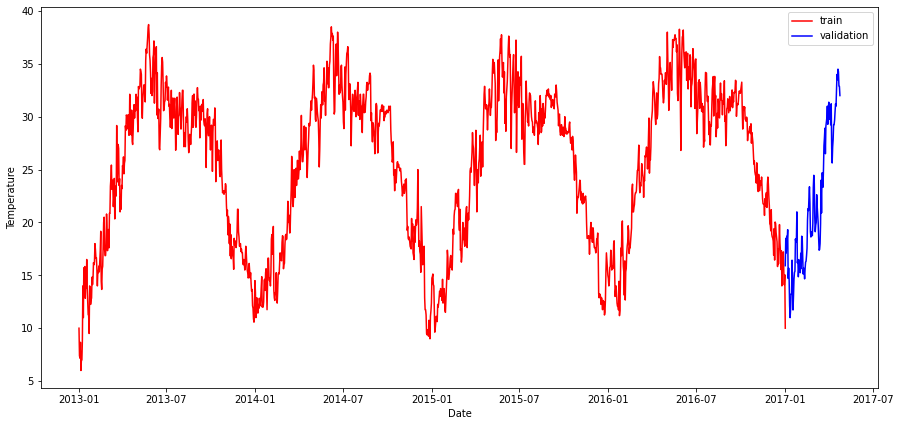

In [ ]:
# создаем область для графика
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)

# задаем названия осей
ax.set_xlabel("Date")
ax.set_ylabel("Temperature")

# с помощью функции plot строим графики, аргументами подаем , подписи, цвет линий 
ax.plot(train.index, train["meantemp"], color="red", label="train")
ax.plot(val.index, val["meantemp"], color="blue", label="validation")
ax.legend(); # метод для отображения легенды графика



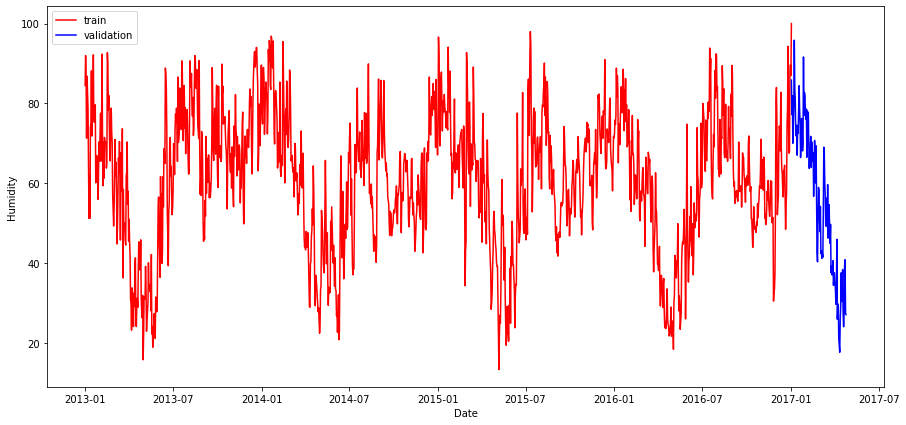

In [ ]:
# создаем область для графика
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)

# задаем названия осей
ax.set_xlabel("Date")
ax.set_ylabel("Humidity")

# с помощью функции plot строим графики, аргументами подаем , подписи, цвет линий 
ax.plot(train.index, train["humidity"], color="red", label="train")
ax.plot(val.index, val["humidity"], color="blue", label="validation")
ax.legend(); # метод для отображения легенды графика



Наблюдается сезонность, давайте посмотрим на график коэфффициентов автокорреляционной функции.

*Автокорреляционная функция — зависимость взаимосвязи между функцией (сигналом) и её сдвинутой копией от величины временного сдвига.



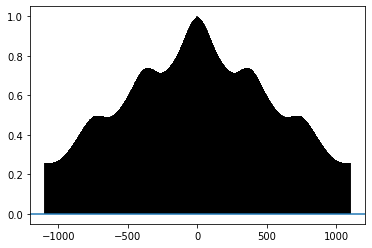

In [ ]:
plt.acorr(train.meantemp, maxlags=365*3);

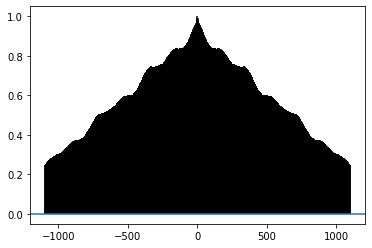

In [ ]:
plt.acorr(train.humidity, maxlags=365*3);

Теперь у нас есть некоторые знания о данных, которые мы сможем использовать при решении нашей задачи.

## 2. Постановка задачи и начальные идеи ее решения

Постараемся сформулировать нашу задачу.

У нас есть непрерывная целевая переменная - температура, есть данные об этой переменной в прошлом, и о других переменных, которые, возможно связаны с целевой.

Нужно предсказать ее значение в будущем ⬆


In [ ]:
train['static_prediction'] = train.meantemp.mean()
# поскольку мы ничего не знаем о валидации, и нам нужно честно проверить на ней качество нашего подхода, для обучения мы можем использовать только train
val['static_prediction'] = train.meantemp.mean() 

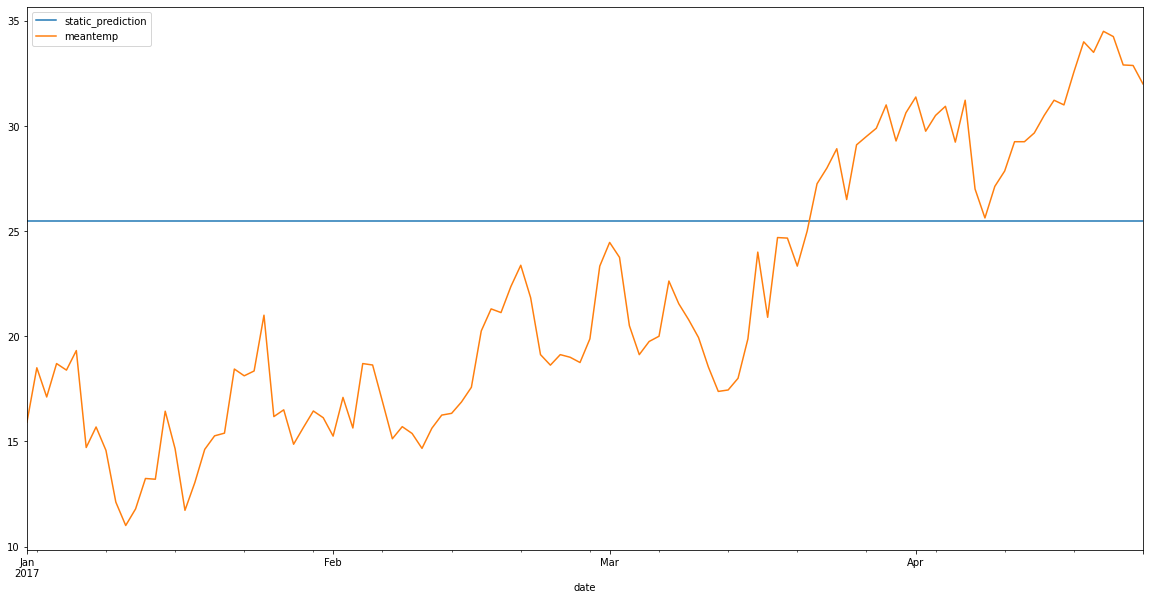

In [ ]:
# посмотрим насколько наш прогноз хорош графическим способом
val[['static_prediction', 'meantemp']].plot(figsize=(20,10));

Выглядит глупо - мы видели, что есть сезонность - давайте попробуем предсказывать среднюю температуру по месяцу

In [ ]:
# для начала сделаем признак, равный месяцу из нашей даты
train['month'] = train.index.to_series().apply(lambda x : x.month)
val['month'] = val.index.to_series().apply(lambda x : x.month)

# после посчитаем средние температуры для каждого месяца
month_means = train.groupby('month')['meantemp'].mean().to_dict()

print(month_means)


{1: 13.311914285714286, 2: 17.620422166329245, 3: 22.914103302611366, 4: 29.376614392551893, 5: 33.31588918526867, 6: 33.734010607448106, 7: 30.995781565314296, 8: 30.601776852904106, 9: 30.433215874175826, 10: 27.11315430900459, 11: 20.656854544822895, 12: 15.666317026303092}


In [ ]:
# подставим в каждый ряд значений, соответствующее месяцу в этом ряду 
train['mean_by_month'] = train.month.apply(lambda x: month_means[x])
val['mean_by_month'] = val.month.apply(lambda x: month_means[x])

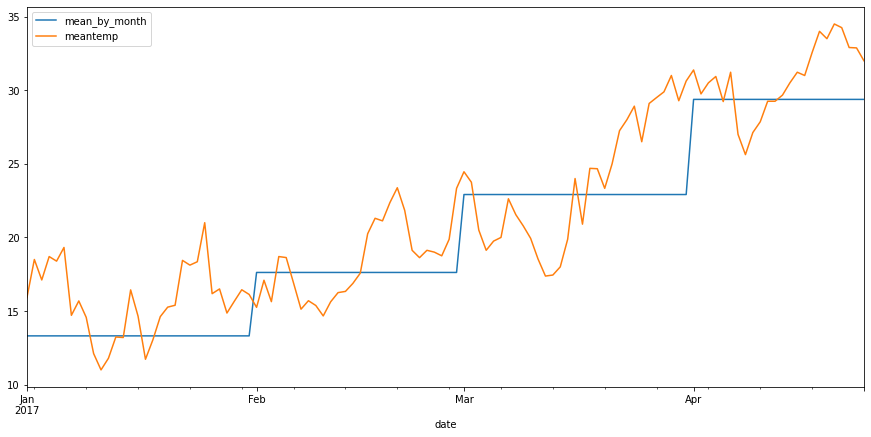

In [ ]:
val[['mean_by_month', 'meantemp']].plot(figsize=(15,7));

Выглядит уже лучше - но, проверять качество на глаз, не самая хорошая идея - нужны точные оценки качества.

Используя нашу валидационную выборку, можно оценить качество модели на данных, которые обученная модель не видела

In [ ]:
train['bad_predict'] = 0 # введем очень плохой прогноз, чтобы проверить, что метрики репрезентативны

### Наши метрики
1) MAE - средняя абсолютная ошибка

2) R2 - коэффициент детерминации

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=13FKFvhUo84wv4ezt_MdurR5emDIcMrSw' />
<figcaption>Средняя абсолютная разность между предсказанием модели и целевым значением.</figcaption></center>
</figure>


<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=1gLxmxHN4k_m0HySiuKZSBKKk64so9yRr' />
<figcaption>Коэффициент детерминации показывает какая доля дисперсии целевой переменной объяснена моделью</figcaption></center>
</figure>


Мы воспользуемся библиотекой sklearn, в частности, ее разделом metrics:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

In [ ]:
print(f'Metrics on train')
print(f'Mean absolute error for bad predict {mae(train.meantemp, train.bad_predict)}')
print(f'Mean absolute error for static predict {mae(train.meantemp, train.static_prediction)}')
print(f'Mean absolute error for average by month predict {mae(train.meantemp, train.mean_by_month)}')

Metrics on train
Mean absolute error for bad predict 25.495520655761762
Mean absolute error for static predict 6.362669969531053
Mean absolute error for average by month predict 2.111694839527532


Отличные результаты на обучающей выборке, НО среднего отклонения недостаточно, мы видим, что предсказание средних по месяцам не совсем адекватно. Давайте добавим еще метрик, и обернем наше предсказание и его оценку в функции.

In [ ]:
def make_preds(df_val, df_train, col):
  '''Эта функция нужна для предсказания значений нашими эвристиками.

  :param df_val: Датафрейм на котором мы делаем предскзаание
  :param df_train: Датафрейм на котором мы собираем данные для предсказания 
  :param col: Колонка, значения которой мы будем предсказывать
  
  :return: Датафрейм с предсказанными значениями и реальным значением предсказанного признака
  '''
  preds = df_val.copy()

  preds['bad_predict'] = 0
  preds['static_prediction'] = df_train[col].mean()
  
  month_means = df_train.groupby('month')[col].mean().to_dict()
  preds['mean_by_month'] = df_val.month.apply(lambda x: month_means[x])

  return preds[[col, 'bad_predict', 'static_prediction', 'mean_by_month']]

def get_metrics(df, target, cols):
  '''Эта функция нужна для вывода метрик модели 

  :param df: Датафрейм на котором мы смотрим метрики
  :param target: Колонка которую мы предсказывали 
  :param cols: Список колонок, которые будем сравнивать с реальными значениями
  '''
  for c in cols:
    print(f'Mean absolute error for {c} {mae(df[target], df[c])}')
    print(f'R2 for {c} {r2_score(df[target], df[c])}')


In [ ]:
preds = make_preds(val, train, 'meantemp')
get_metrics(preds, 'meantemp', ['bad_predict', 'static_prediction', 'mean_by_month'])

Mean absolute error for bad_predict 21.713078920228238
R2 for bad_predict -11.758317582961405
Mean absolute error for static_prediction 6.612379974713908
R2 for static_prediction -0.356818084926537
Mean absolute error for mean_by_month 2.7964537062302814
R2 for mean_by_month 0.7139732807499639


Мы наблюдаем ухудшение значений метрик для валидации, но, тем не менее, такое качество пока устраивает.

In [ ]:
preds = make_preds(val, train, 'humidity')
get_metrics(preds, 'humidity', ['bad_predict', 'static_prediction', 'mean_by_month'])

Mean absolute error for bad_predict 56.25836183726328
R2 for bad_predict -8.781860038209803
Mean absolute error for static_prediction 16.71209460093857
R2 for static_prediction -0.05652081298087186
Mean absolute error for mean_by_month 8.982604432195537
R2 for mean_by_month 0.641876530478038


С предскзаанием влажности дела обстоят хуже - нужно решать эту проблему.

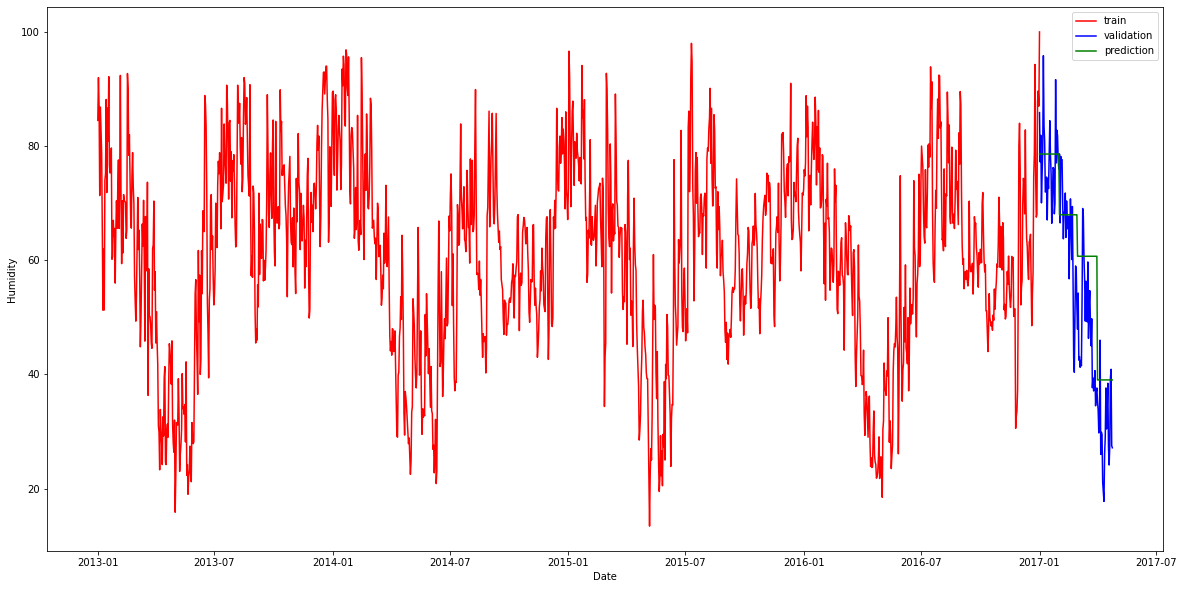

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_xlabel("Date")
ax.set_ylabel("Humidity")

ax.plot(train.index, train["humidity"], color="red", label="train")

ax.plot(val.index, val["humidity"], color="blue", label="validation")
ax.plot(val.index, preds['mean_by_month'],color="green", label="prediction")

ax.legend()



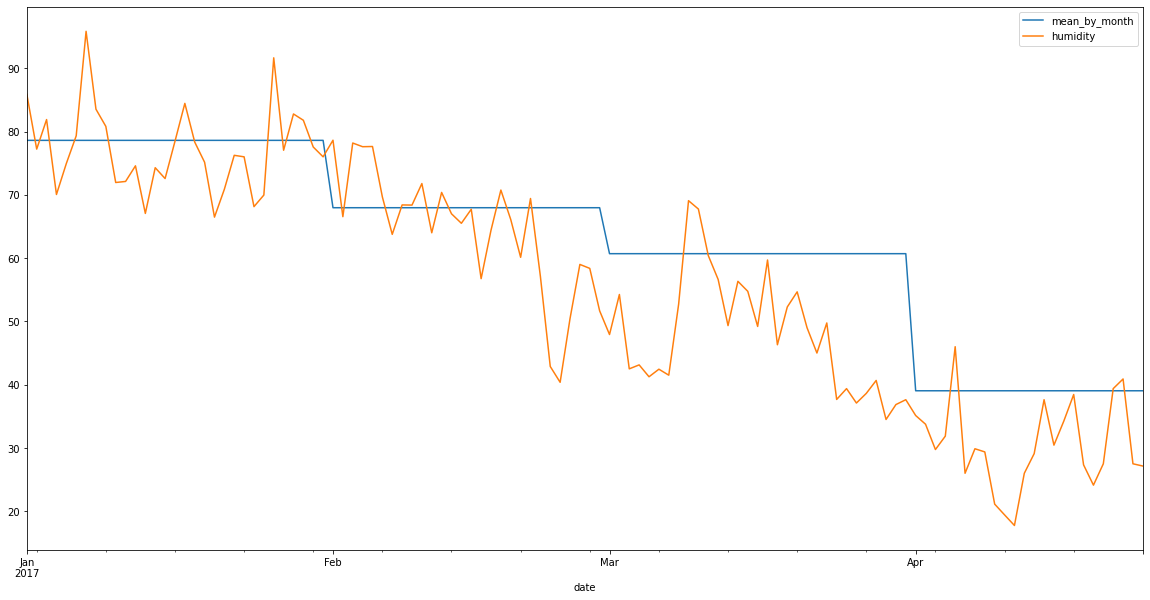

In [ ]:
preds[['mean_by_month', 'humidity']].plot(figsize=(20,10));

## 3. Создание модели

Мы увидели, что наших идей недостаточно, давайте попробуем применить машинное обучение 🤖

Начнем с модели Линейной Регрессии : 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Принцип ее работы такой - подобрать вектор коэффициентов, который при перемножении его с вектором признаков будет максимально хорошо приближать целевую переменную.

<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=18h4o1kQ_VfG2R_d6Ii76tLt9QpStk5qO' />
<figcaption>По графику можно предположить, что линейная регрессия оптимизирует MSE, и это действительно так ⛄</figcaption></center>
</figure>


In [ ]:
# признаки, на которых будем обучать модель
features = ['meantemp', 'wind_speed', 'meanpressure', 'month']
target = 'humidity'

In [ ]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

Описание линейной регрессии, картинка, ссылка, как обучается

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

preds = reg.predict(X_val)

In [ ]:
print(f'Mean absolute error {mae(y_val, preds)}')
print(f'R2 {r2_score(y_val, preds)}')

Mean absolute error 11.65252330682359
R2 0.4464838642283988


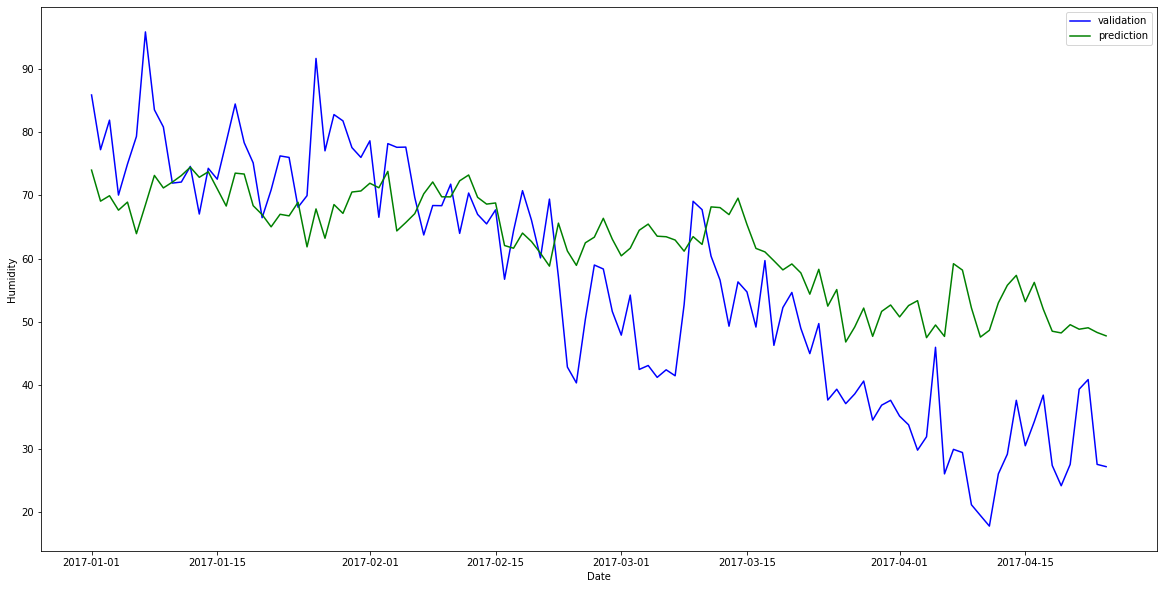

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.set_xlabel("Date")
ax.set_ylabel("Humidity")

ax.plot(val.index, y_val, color="blue", label="validation")
ax.plot(val.index, preds,color="green", label="prediction")

ax.legend();



### 3.2 Feature engineering, улучшение прогноза

Мы никак не использовали информацию о данных, которая у нас была - это не очень хорошо :)
Попробуем улучшить наш результат, придумав новые признаки.

Подход при котором мы пытаемся создать новые признаки из имеющихся данных называется feature engineering. Как правило, этот этап является одним из самых важных при работе с табличными данными.

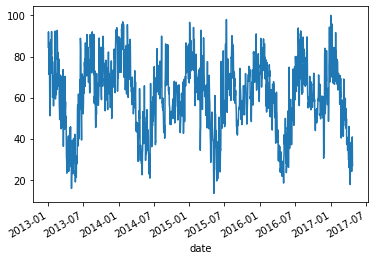

In [ ]:
# склеим наш датафрейм 

# пометим где находится обучающая выборка, а где валидационная
train['is_val'] = 0
val['is_val'] = 1

data = train.append(val)

data['humidity'].plot();

Напишем функции для создания дополнительных признаков, разделения на обучение и валидацию

In [ ]:
def map_season(month):
  ''' 
  Эта функция нужна для получения времени года из номера месяца
  :param month: Номер месяца
  :return: Строку с названием времени года к которому относится месяц
  ''' 
  if month in [12,1,2]:
    return 0
  elif month in [3,4,5]:
    return 1
  elif month in [6,7,8]:
    return 2
  return 3



def make_lags(data, cols, target_col):
  '''Эта функция нужна для создания признаков, на которых будет обучаться модель

  :param data: Изначальная выборка, из которой получим train и val
  :param cols: Список колонок, по которым соберем статистики
  :param target_col: Название целевого признака
  
  :return: Датафрейм, состоящий их признаков, необходимых для обучения модели
  ''' 

  X = data.copy()[['is_val', 'month', target]]

  # соберем лаг фичи, то есть значение каждого признака неделю назад и т.д.
  for c in cols:
    temps = data[c]  

    # feats = pd.concat([temps.shift(7), temps.shift(2), temps.shift(1)], axis=1)
    # feats.columns = ['t-7'+c, 't-2'+c, 't-1'+c]


    feats = pd.concat([temps.shift(7), temps.shift(2)], axis=1)
    feats.columns = ['t-7'+c, 't-2'+c]

    X = pd.concat([X, feats], axis=1)

  df_train = data[data.is_val==0]

  # считаем наши статистики по месяцам и добавляем их как фичи
  for c in cols: 
    month_means = df_train.groupby('month')[c].mean().to_dict()
    X[f'mean_by_month_{c}'] = X.month.apply(lambda x: month_means[x])
  
  X_train = X[X.is_val==0].drop(columns=['is_val', target])
  X_val = X[X.is_val==1].drop(columns=['is_val', target])
  y_train = X[X.is_val==0][target]
  y_val = X[X.is_val==1][target]


  return X_train, X_val, y_train, y_val

In [ ]:
cols = ['meantemp', 'wind_speed', 'meanpressure', 'month', 'humidity']
X_train, X_val, y_train , y_val = make_lags(data, cols, 'humidity')


In [ ]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

Еще один важный момент при решении задач с использованием машинного обучения: нужно понимать границы применимости моделей, а также их особенные свойства. К примеру, для лучшей работы линейных моделей данные нужно сначала отскейлить.

z = (x - u) / s 

x - значение, которое мы хотим отскалировать
u - среднее значение на трейне
s = стандартное отклонение

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

In [ ]:
sc = StandardScaler()
reg = LinearRegression().fit(sc.fit_transform(X_train), y_train)
preds = reg.predict(sc.transform(X_val))

Metrics on val
Mean absolute error for predict 7.075824828083841
R2 for predict 0.7903954859693351


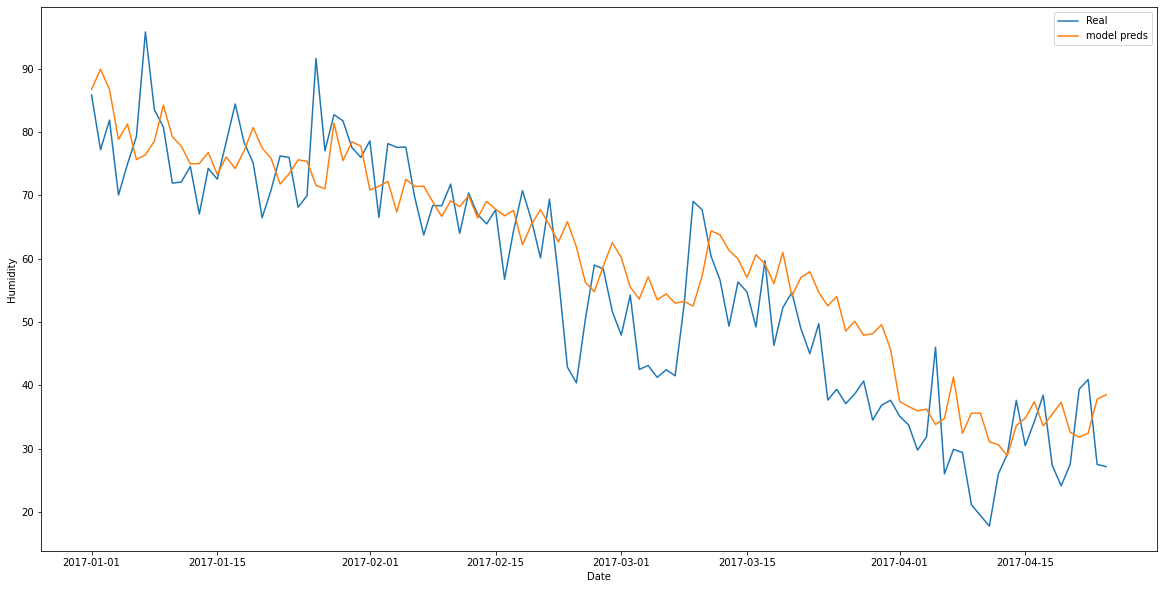

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

true = ax.plot(val.index, val['humidity'], label = 'Real')
model = ax.plot(val.index, preds, label = 'model preds')


ax.set_xlabel("Date")
ax.set_ylabel('Humidity')

plt.legend();

print(f'Metrics on val')
print(f'Mean absolute error for predict {mae(val.humidity, preds)}')
print(f'R2 for predict {r2_score(val.humidity, preds)}')


In [ ]:
def visualize_coefficients(model, feature_names, n_top_features=25):
    '''Эта функция нужна для визуализации величиеы коэффициентов модели для признаков
    :param model: Обученная модель
    :param feature_names: Список признаков, на которых обучалась модель
    :param n_top_features: Количество фичей, которое мы хотим обобразить    
    ''' 

    # get coefficients with large absolute values based on
    # https://habr.com/ru/company/ods/blog/323890/#6-plyusy-i-minusy-lineynyh-modeley-v-zadachah-mashinnogo-obucheniya
    
    coef = model.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(0, 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

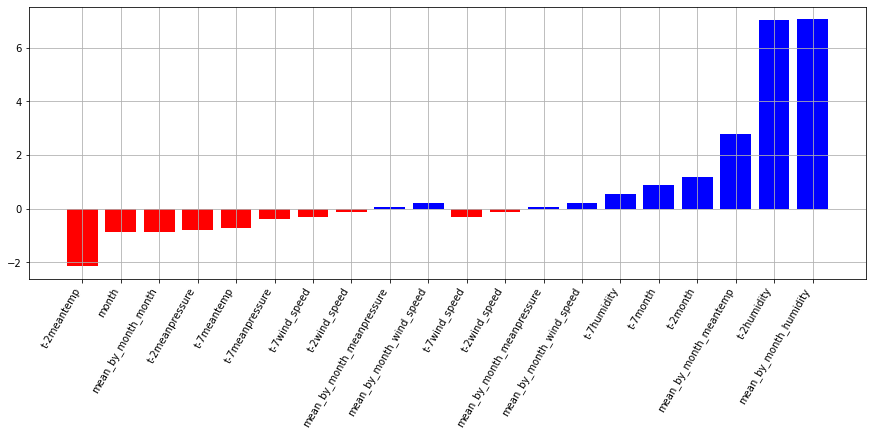

In [ ]:
visualize_coefficients(reg, list(X_val.columns), 10)
plt.grid(True)

## 3.3 Градиентный бустинг

Теперь опробуем реальный инструмент data scientist'а - градиентный бустинг! 

Идея состоит в том, чтобы последовательно обучать модели исправлять ошибки предыдущих.


1) обучаем простую модель ->

2) считаем ее ошибки -> 
 
3) обучаем вторую модель предсказывать ошибки первой модели 
 
 и так далее ⏩

После складываем предикты всех наших моделей и получаем финальный прогноз.



<figure>
<center>
<img src='https://drive.google.com/uc?export=view&id=18j9qhKed4XophqHNyOVhIbi679iraGGL' />
<figcaption>Как видно из картинки, деревья обучаются последовательно</figcaption></center>
</figure>

In [ ]:
def make_features(data, cols, target_col):
  '''Эта функция нужна для создания признаков, на которых будет обучаться модель

  :param data: Изначальная выборка, из которой получим train и val
  :param cols: Список колонок, по которым соберем статистики
  :param target_col: Название целевого признака
  
  :return: Датафрейм, состоящий их признаков, необходимых для обучения модели
  ''' 

  X = data.copy()[['is_val', 'month', target]]


  X['year'] = data.index.year
  X['day'] = data.index.day
  X['dayofweek'] = data.index.dayofweek 
  X['season'] = data['month'].apply(lambda x: map_season(x))

  # посчитаем лаг фичи за больший промежуток времени
  for c in cols:
    temps = data[c]
    feats = pd.concat([temps.shift(365*2), temps.shift(365)] + [temps.shift(i) for i in range(2, 31, 1)], axis=1)
    feats.columns = ['t-365*2|'+c, 't-365|'+c] + [f't-{i}|'+c for i in range(2, 31, 1)] 
    X = pd.concat([X, feats], axis=1)

  for c in cols:
    temps = data[c]
    feats = pd.concat([temps.shift(1).rolling(3).mean(),
                       temps.shift(1).rolling(7).mean(),
                       temps.shift(1).rolling(7).min(),
                       temps.shift(1).rolling(7).max()], axis=1)
    feats.columns = ['window_mean_7_'+c, 
                     'window_mean_3_'+c,
                     'window_min_7_'+c,
                     'window_max_7_'+c] 

    X = pd.concat([X, feats], axis=1)

  
  df_train = data[data.is_val==0]

  # считаем наши статистики и добавляем их как фичи
  for c in cols: 
    month_means = df_train.groupby('month')[c].mean().to_dict()
    X[f'mean_by_month_{c}'] = X.month.apply(lambda x: month_means[x])
  
  for c in cols: 
    month_mins = df_train.groupby('month')[c].min().to_dict()
    X[f'min_by_month_{c}'] = X.month.apply(lambda x: month_mins[x])

  for c in cols: 
    month_maxs = df_train.groupby('month')[c].max().to_dict()
    X[f'max_by_month_{c}'] = X.month.apply(lambda x: month_maxs[x])
      
  X_train = X[X.is_val==0].drop(columns=['is_val', target])
  X_val = X[X.is_val==1].drop(columns=['is_val', target])
  y_train = X[X.is_val==0][target]
  y_val = X[X.is_val==1][target]

  return X_train, X_val, y_train, y_val

In [ ]:
# cols = ['meantemp', 'wind_speed', 'meanpressure', 'month', 'humidity']
cols = ['meantemp', 'humidity']

X_train, X_val, y_train , y_val = make_features(data, cols, 'humidity')


In [ ]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

In [ ]:
from lightgbm import LGBMRegressor


params = {'learning_rate' : 0.01,
           'n_estimators' : 700,
           'boosting_type' : 'gbdt'
              ###YOUR CODE HERE###
}


reg = LGBMRegressor(**params).fit(X_train, y_train)
preds = reg.predict(X_val)


Metrics on val
Mean absolute error for predict 7.081370909674468
R2 for predict 0.7837179609975657


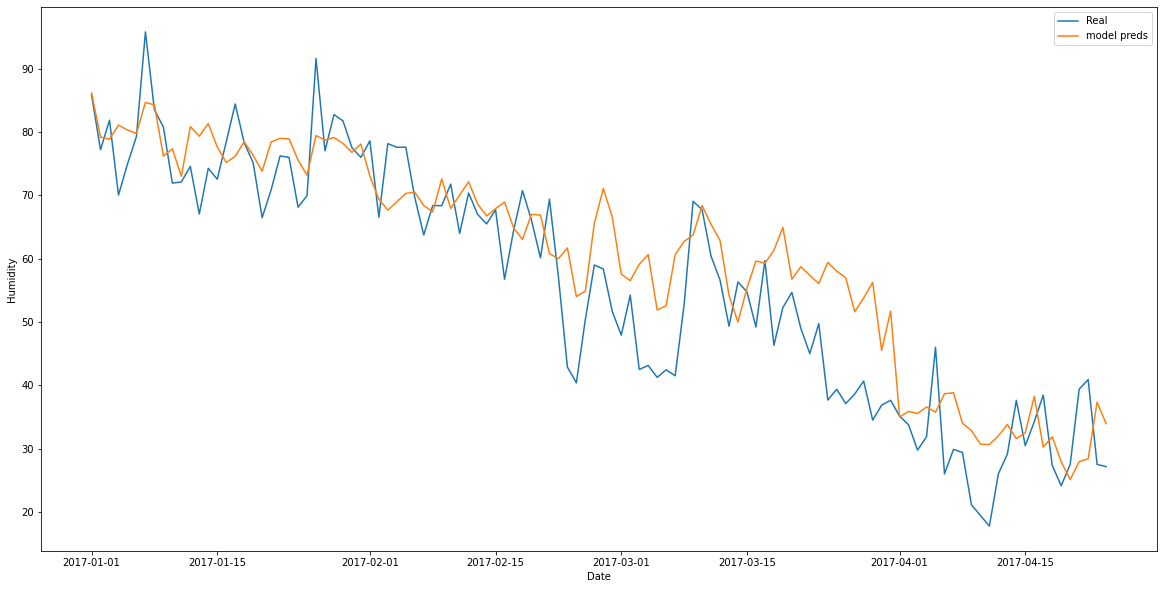

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

true = ax.plot(val.index, val['humidity'], label = 'Real')
model = ax.plot(val.index, preds, label = 'model preds')


ax.set_xlabel("Date")
ax.set_ylabel('Humidity')

plt.legend();

print(f'Metrics on val')
print(f'Mean absolute error for predict {mae(val.humidity, preds)}')
print(f'R2 for predict {r2_score(val.humidity, preds)}')


Попробуем интерпретировать нашу модель! 

В случае бустинга не получится просто взять и достать коэффициенты, которые модель раздала признакам, так как модель так не работает 😢

Методов интерпретации много, но сейчас мы воспользуемся одним из самых популярных на сегодня - SHAP VALUES.

Идея состоит в том, чтобы проверить - насколько поменяется предсказание модели в зависимости от значения конкретного признака. 


In [ ]:
# для этого вначале установим библиотеку shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [ ]:
import shap
%time shap_values = shap.TreeExplainer(reg).shap_values(X_val)


CPU times: user 3.11 s, sys: 30.1 ms, total: 3.14 s
Wall time: 2.01 s


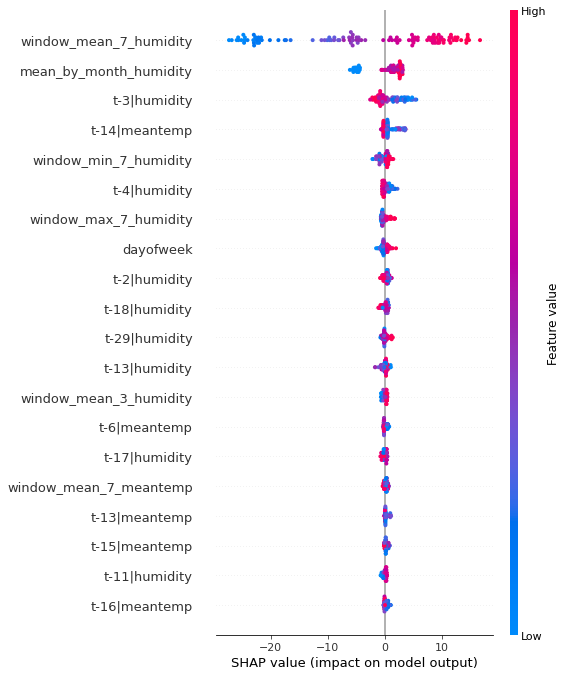

In [ ]:
shap.summary_plot(shap_values, X_val)


### *Target transformation

Мы уже работали с признаками - теперь давайте попробуем поработать с таргетом.
Мы можем обучить модель решать какую-то другую версию нашей задачи, засчет чего качество решения изначальной задачи увеличится. 


Погодите, сейчас будет понятнее 🐨

In [ ]:
def make_features(data, cols, target_col):
  '''Эта функция нужна для создания признаков, на которых будет обучаться модель

  :param data: Изначальная выборка, из которой получим train и val
  :param cols: Список колонок, по которым соберем статистики
  :param target_col: Название целевого признака
  
  :return: Датафрейм, состоящий их признаков, необходимых для обучения модели
  ''' 

  X = data.copy()[['is_val', 'month', target]]


  X['year'] = data.index.year
  X['day'] = data.index.day
  X['dayofweek'] = data.index.dayofweek 
  X['season'] = data['month'].apply(lambda x: map_season(x))

  # посчитаем лаг фичи за больший промежуток времени
  for c in cols:
    temps = data[c]
    feats = pd.concat([temps.shift(365*2), temps.shift(365)] + [temps.shift(i) for i in range(2, 31, 1)], axis=1)
    feats.columns = ['t-365*2|'+c, 't-365|'+c] + [f't-{i}|'+c for i in range(2, 31, 1)] 
    X = pd.concat([X, feats], axis=1)

  for c in cols:
    temps = data[c]
    feats = pd.concat([temps.shift(1).rolling(3).mean(),
                       temps.shift(1).rolling(7).mean(),
                       temps.shift(1).rolling(7).min(),
                       temps.shift(1).rolling(7).max()], axis=1)
    feats.columns = ['window_mean_7_'+c, 
                     'window_mean_3_'+c,
                     'window_min_7_'+c,
                     'window_max_7_'+c] 

    X = pd.concat([X, feats], axis=1)

  
  df_train = data[data.is_val==0]

  # считаем наши статистики и добавляем их как фичи
  for c in cols: 
    month_means = df_train.groupby('month')[c].mean().to_dict()
    X[f'mean_by_month_{c}'] = X.month.apply(lambda x: month_means[x])
  
  for c in cols: 
    month_mins = df_train.groupby('month')[c].min().to_dict()
    X[f'min_by_month_{c}'] = X.month.apply(lambda x: month_mins[x])

  for c in cols: 
    month_maxs = df_train.groupby('month')[c].max().to_dict()
    X[f'max_by_month_{c}'] = X.month.apply(lambda x: month_maxs[x])
      
  X_train = X[X.is_val==0].drop(columns=['is_val', target])
  X_val = X[X.is_val==1].drop(columns=['is_val', target])
  y_train = X[X.is_val==0][target]
  y_val = X[X.is_val==1][target]

  return X_train, X_val, y_train, y_val

In [ ]:
cols = ['meantemp', 'wind_speed', 'meanpressure', 'month', 'humidity']
X_train, X_val, y_train , y_val = make_features(data, cols, 'humidity')


In [ ]:
train_target = pd.concat([y_train, y_train.shift(1)], names = ['humidity', 'humidity_yesterday'], axis = 1)
train_target.columns = ['humidity', 't-1|humidity']

val_target = pd.concat([y_val, y_val.shift(1)], axis = 1)
val_target.columns = ['humidity', 't-1|humidity']


In [ ]:
train_target

,humidity,t-1|humidity
date,,
2013-01-01,84.500000,NaN
2013-01-02,92.000000,84.500000
2013-01-03,87.000000,92.000000
2013-01-04,71.333333,87.000000
2013-01-05,86.833333,71.333333
...,...,...
2016-12-28,68.043478,67.550000
2016-12-29,87.857143,68.043478
2016-12-30,89.666667,87.857143


In [ ]:
train_target['t'] = train_target.iloc[:, 0] / train_target.iloc[:, 1] 
val_target['t'] = val_target.iloc[:, 0] / val_target.iloc[:, 1] 

train_target = train_target.iloc[1:]
val_target = val_target.iloc[1:]

In [ ]:
train_target

,humidity,t-1|humidity,t
date,,,
2013-01-02,92.000000,84.500000,1.088757
2013-01-03,87.000000,92.000000,0.945652
2013-01-04,71.333333,87.000000,0.819923
2013-01-05,86.833333,71.333333,1.217290
2013-01-06,82.800000,86.833333,0.953551
...,...,...,...
2016-12-28,68.043478,67.550000,1.007305
2016-12-29,87.857143,68.043478,1.291191
2016-12-30,89.666667,87.857143,1.020596


In [ ]:
X_train, X_val, y_train , y_val = X_train.iloc[1:], X_val.iloc[1:], train_target['t'], val_target['t']



In [ ]:
X_train = X_train.fillna(0)
X_val = X_val.fillna(0)

### Линейная регрессия 

In [ ]:
sc = StandardScaler()
reg = LinearRegression().fit(sc.fit_transform(X_train), y_train)
preds = reg.predict(sc.transform(X_val))


In [ ]:
val_target['preds'] = preds

In [ ]:
val_target

,humidity,t-1|humidity,t,preds
date,,,,
2017-01-02,77.222222,85.869565,0.899297,1.041415
2017-01-03,81.888889,77.222222,1.060432,1.139958
2017-01-04,70.050000,81.888889,0.855427,1.073858
2017-01-05,74.944444,70.050000,1.069871,1.002732
2017-01-06,79.318182,74.944444,1.058360,1.028620
...,...,...,...,...
2017-04-20,27.500000,24.125000,1.139896,1.085491
2017-04-21,39.375000,27.500000,1.431818,1.041101
2017-04-22,40.900000,39.375000,1.038730,0.978811


In [ ]:
val_target['predicted_humidity'] = val_target['t-1|humidity'] * val_target['preds']

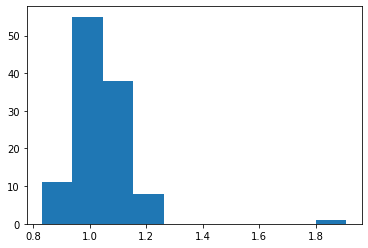

In [ ]:
plt.hist(preds);

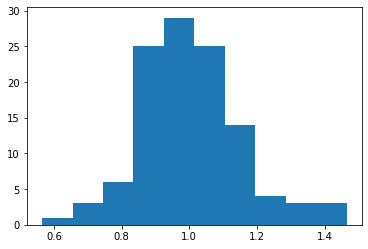

In [ ]:
plt.hist(y_val);

Metrics on val
Mean absolute error for predict 6.246108814480723
R2 for predict 0.8099591413915823


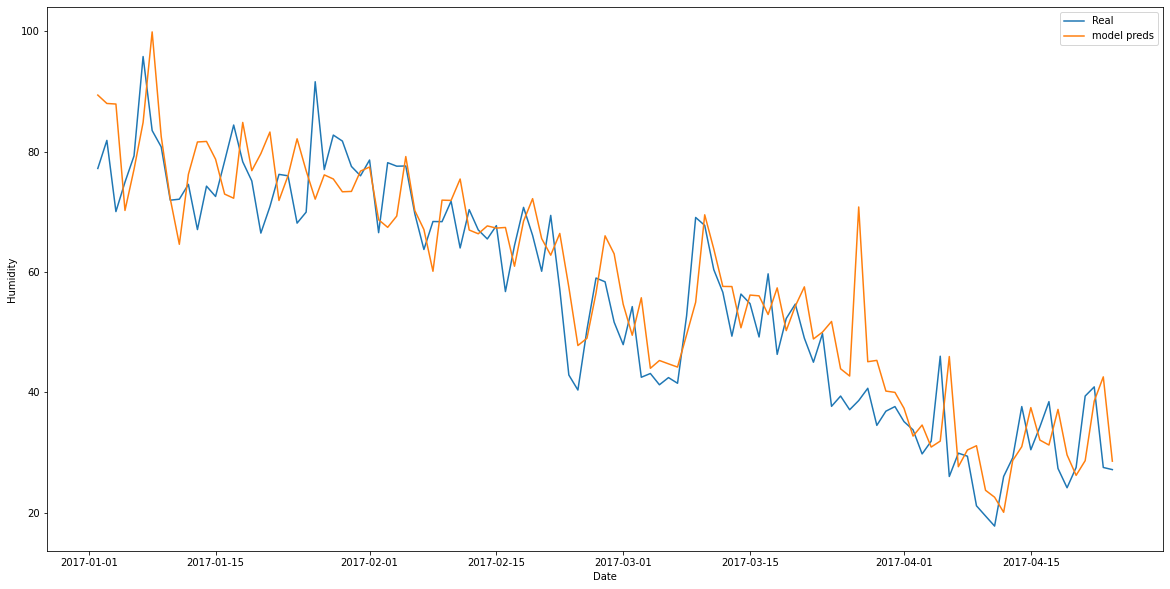

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

true = ax.plot(X_val.index, val_target.iloc[:,0], label = 'Real')
model = ax.plot(X_val.index, val_target['predicted_humidity'], label = 'model preds')


ax.set_xlabel("Date")
ax.set_ylabel('Humidity')

plt.legend();

print(f'Metrics on val')
print(f'Mean absolute error for predict {mae(val_target.iloc[:,0], val_target["predicted_humidity"])}')
print(f'R2 for predict {r2_score(val_target.iloc[:,0], val_target["predicted_humidity"])}')


### Градиентный бустинг 

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor


params = {'learning_rate' : 0.01,
              'n_estimators' : 700,
              'boosting_type' : 'gbdt'
              ###YOUR CODE HERE###
}


reg = LGBMRegressor(**params).fit(X_train, y_train)
preds = reg.predict(X_val)


In [ ]:
val_target['preds'] = preds

In [ ]:
val_target['predicted_humidity'] = val_target['t-1|humidity'] * val_target['preds']

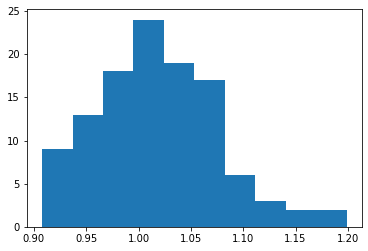

In [ ]:
# также сравним предсказанное распределение с распределением целевой переменной на валидации
plt.hist(preds);

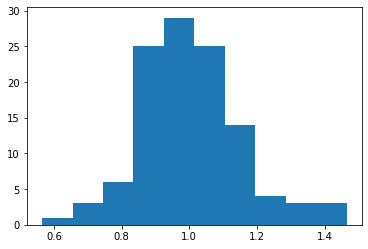

In [ ]:
plt.hist(y_val);

Metrics on val
Mean absolute error for predict 5.914639629490037
R2 for predict 0.8393928654261588


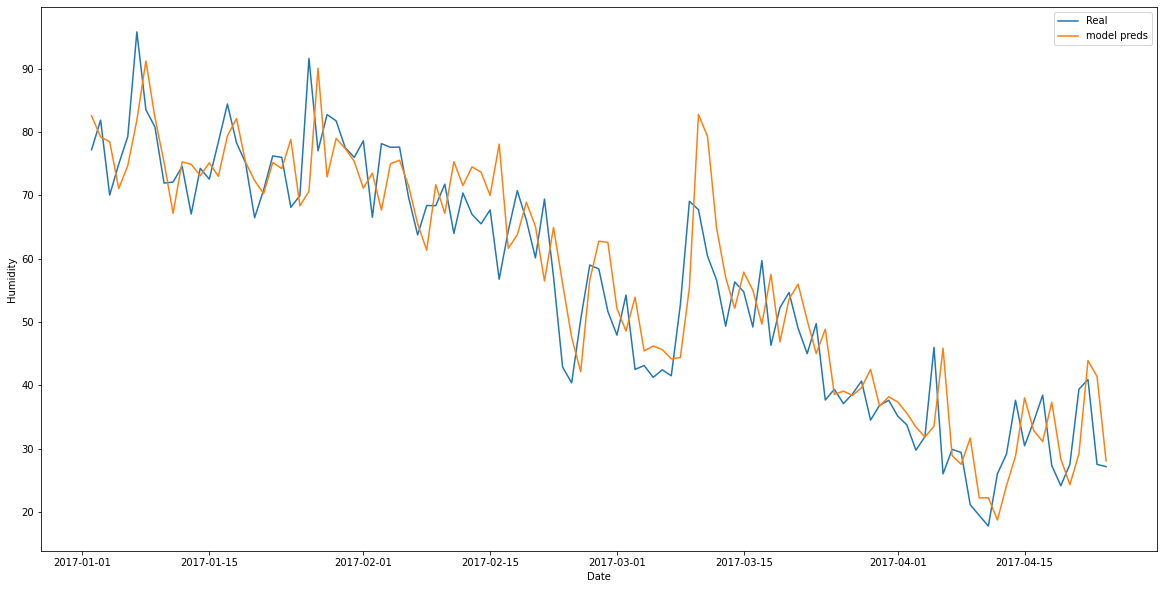

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

true = ax.plot(X_val.index, val_target.iloc[:,0], label = 'Real')
model = ax.plot(X_val.index, val_target['predicted_humidity'], label = 'model preds')


ax.set_xlabel("Date")
ax.set_ylabel('Humidity')

plt.legend();

print(f'Metrics on val')
print(f'Mean absolute error for predict {mae(val_target.iloc[:,0], val_target["predicted_humidity"])}')
print(f'R2 for predict {r2_score(val_target.iloc[:,0], val_target["predicted_humidity"])}')

In [ ]:
import shap
%time shap_values = shap.TreeExplainer(reg).shap_values(X_val)


CPU times: user 3.3 s, sys: 19.2 ms, total: 3.32 s
Wall time: 2.12 s


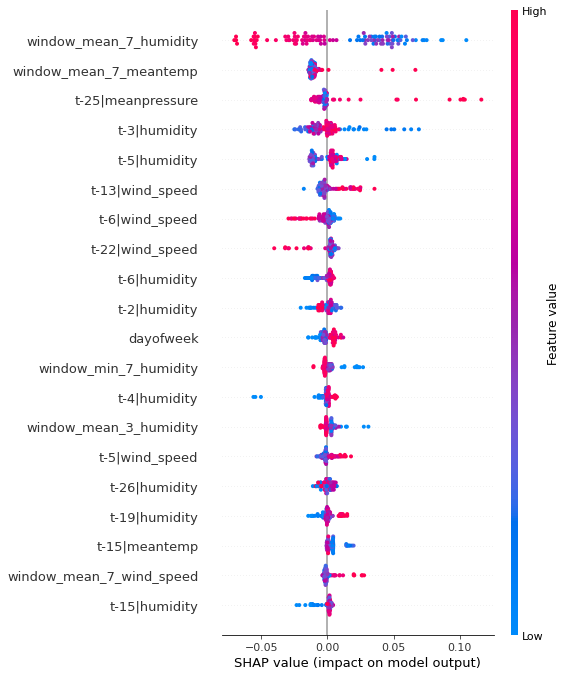

In [ ]:
shap.summary_plot(shap_values, X_val)

### Домашка

1) В рассмотренной нами библиотеке sklearn также есть реализация градиентного бустинга : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

Попробуйте ее применить на нашей задаче, изменится ли качество предсказания? 



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Сначала необходимо указать параметры модели
params = {}

###
# Здесь необходимо написать код для инициализации модели и ее обучения
###

preds = reg.predict(X_val)


In [ ]:
# Также не забудьте, что предсказания нужно трансформировать к изначальному таргету задачи
# val_target['predicted_humidity'] = 

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

true = ax.plot(X_val.index, val_target.iloc[:,0], label = 'Real')
model = ax.plot(X_val.index, val_target['predicted_humidity'], label = 'model preds')


ax.set_xlabel("Date")
ax.set_ylabel('Humidity')

plt.legend();

print(f'Metrics on val')
print(f'Mean absolute error for predict {mae(val_target.iloc[:,0], val_target["predicted_humidity"])}')
print(f'R2 for predict {r2_score(val_target.iloc[:,0], val_target["predicted_humidity"])}')

2) В воркшопе мы не затронули тему подбора параметров модели, но вы можете сделать это самостоятельно.

Один из самых популярных методов подбора параметров - поиск по решетке. Суть метода заключается в том, что мы задаем все возможные комбинации параметров и перебираем их. Потом сохраняем лучшуюю



In [ ]:
from sklearn.model_selection import GridSearchCV

# здесь задайте словарик с областью значений каждого параметра
parameters = {'n_estimators': []}

# здесь необходимо инициализировать модель, для которой отбираем параметры
# model = 
reg = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)

# Дальше необходимо вывести лучшие параметры - посмотрите в документации как это сделать :) Подсказка: в разделе атрибуты, best....
# YOUR CODE HERE

3) Мы выбрали параметры, но возрастет ли качество на валидации? 
   Используя модель с лучшими параметрами, сделайте предсказание на валидации и оцените качество так, как мы делали это раньше 

In [ ]:
###
### PLACE FOR CODE
###

# BONUS 

Если интересно развиваться в DS то:

1) Для начала неплохо бы закрыть языки программирования, основной для DS - это Python. Поэтому можно начать с курсов по этому языку, благо их много и все примерно одинаковые.

2) Также в DS важна математика. Конкретно, это - основы анализа, линейной алгебры, теория вероятности и математическая статистика. Любой из разделов можно изучать по понравившейся книге или лекциям, а по статистике есть очень классный курс, с которого начинало очень много аналитиков и data scientist'ов - https://stepik.org/course/76/syllabus


3) Чтобы разобраться с идеями, стоящими за методами машинного обучения, можно пройти этот курс - https://stepik.org/course/8057/promo?search=678126243 
Здесь без математики, "на пальцах" объясняется как работают те или иные методы.
Если больше интересен курс с большим объемом практических задач, нейросетями - можно пройти https://stepik.org/course/91156/promo?search=678126245. 

4) Отдельно хочется выделить https://habr.com/ru/company/ods/blog/322626/ - один из лучших курсов по машинному обучению, подробное объяснение каждого алгоритма классического ML, объяснение математики, которая стоит за всем этим и много классных домашек по каждому модулю.

----- Если не пугает математика, очень рекомендую ознакомиться с лекциями Евгения Соколова, они есть в открытом доступе на youtube:
https://www.youtube.com/watch?v=QVs8QjuAN74&list=PLEqoHzpnmTfChItexxg2ZfxCsm-8QPsdS&ab_channel=%D0%A4%D0%9A%D0%9D%D0%92%D0%A8%D0%AD



--- Статья про коэффициенты корреляции :

https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

--- Статья про бустинги :   
https://towardsdatascience.com/how-to-select-between-boosting-algorithm-e8d1b15924f